# Reg Plot
Reg plot stands for regression plot. In this type of plot data points are plotted on the graph just like the scatterplot, but in addition to that there is straight line passing through those points showing the relation between dependent ($Y$) and independent ($x$) variable with confidence interval.

### Importing libraries

In [1]:
#importing libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#setting style
sns.set_style('darkgrid')
#checking the version
sns.__version__

'0.11.1'

### Reading the data

In [2]:
diamonds=sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
diamonds.shape

(53940, 10)

In [4]:
diamonds=diamonds.sample(n=200, random_state=44)
diamonds.shape

(200, 10)

### Creating regplot

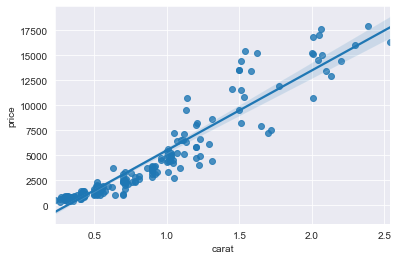

In [5]:
sns.regplot(data=diamonds, x='carat', y='price');

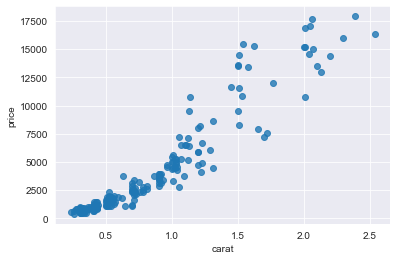

In [6]:
#Turning off the regression line
sns.regplot(data=diamonds, x='carat', y='price', fit_reg=False );

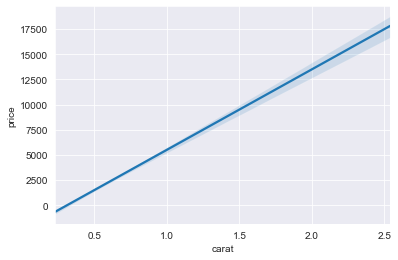

In [7]:
# Turning off the scatter points
sns.regplot(data=diamonds, x='carat', y='price', scatter=False);

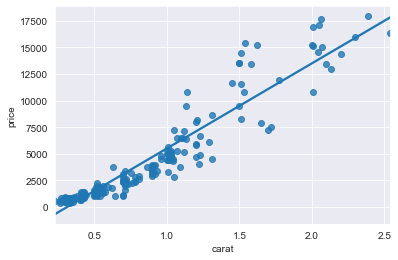

In [8]:
#Turning off the confidence interval
sns.regplot(data=diamonds, x='carat', y='price', ci=None);

### Dealing with discrete variables

In [9]:
#Creating new coumns
cut_map={
    'Fair':1,
    'Good':2,
    'Very Good':3,
    'Premium':4,
    'Ideal':5
}
diamonds['cut_value']=diamonds.cut.map(cut_map)

In [10]:
#Checking the values
diamonds.cut_value.value_counts()

5    80
4    63
3    39
2    11
1     7
Name: cut_value, dtype: int64

In [11]:
#arranging the newly added discrete variable's column into order
diamonds['cut_value']=diamonds['cut_value'].cat.as_ordered()
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_value
40423,0.70,Good,F,I1,63.8,60.0,1134,5.64,5.45,3.54,2
16309,1.11,Premium,H,VS2,61.1,59.0,6527,6.66,6.63,4.06,4
3260,0.93,Fair,G,SI1,64.4,57.0,3358,6.14,6.09,3.94,1
36811,0.30,Premium,G,IF,62.9,58.0,956,4.25,4.21,2.66,4
48721,0.52,Ideal,G,VVS2,60.8,57.0,2012,5.21,5.16,3.15,5


**Plottiing with Discrete Variable**

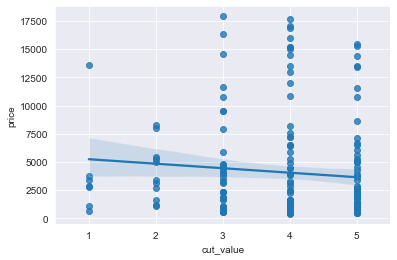

In [12]:
plt.xlim(0.5, 5.5)
sns.regplot(data=diamonds, x='cut_value', y='price');

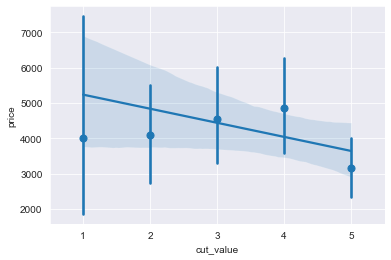

In [13]:
#Estimator Aggregate
plt.xlim(0.5, 5.5)
sns.regplot(data=diamonds, x='cut_value', y='price', x_estimator=np.mean);

### Polynomial Regression

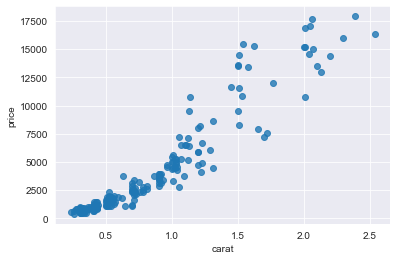

In [14]:
sns.regplot(data=diamonds, x='carat', y='price', fit_reg=False);
#Observe that the data  points aren't varying in straight line rather it seems a curve bending upwards

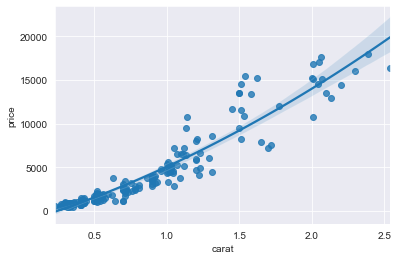

In [15]:
#Changing the order of the polynomial for good fit
sns.regplot(data=diamonds, x='carat', y='price', order=2);

### Robust Regression

In [16]:
x_example=[0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
y_example=[0.1, 0.8, 2.2, 2.7, 3.8, 4.5, 6.2, 6.8, 7.9, 9.4, 30.4]

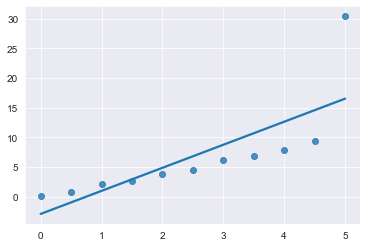

In [17]:
plt.xlim(-0.25, 5.25)
sns.regplot(x=x_example, y=y_example, ci=None);
#As you can see here that there is an outlier which is interupting the linear relation

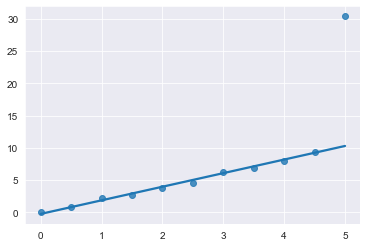

In [18]:
#We can use the arguement `robust` for dealing with the outliers
plt.xlim(-0.25, 5.25)
sns.regplot(x=x_example, y=y_example, ci=None, robust=True);

### Styling

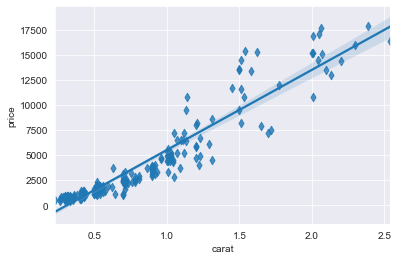

In [19]:
#Marker
sns.regplot(data=diamonds, x='carat', y='price', marker='d');

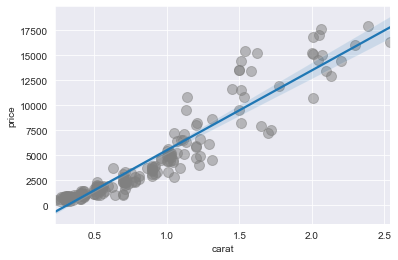

In [20]:
#Scatterplot Key Words for various arguements related to scatterplot at the same time
sns.regplot(data=diamonds, x='carat', y='price', scatter_kws={'s':100, 'alpha':0.5, 'color':'grey'});

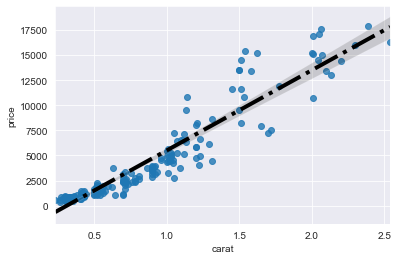

In [21]:
#Lineplot Key Words for arguements related to lineplo at the same time
sns.regplot(data=diamonds, x='carat', y='price', line_kws={'lw':4, 'color':'black', 'linestyle':'-.'});

We will also see the `regplot` in `lmplot`, `jointplot`, `pairplot`.<br>
The End